<a href="https://colab.research.google.com/github/smraytech/test/blob/main/HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HR Analytics & Employee Retention Pipeline – IBM HR Attrition Dataset
Project Goal

Goal: Help HR understand which factors influence employee turnover so they can implement effective retention strategies.

Importance / Key Objectives:

Identify top predictors of attrition — e.g., job satisfaction, overwork, tenure, salary.

Clean and prepare data for reliable analysis.

Explore patterns in employee turnover through visualizations and statistical analysis.

Build predictive models to anticipate attrition risk.

Provide actionable recommendations to HR for retention planning.

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Step 0: Environment Setup

Import libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

Step 1: Load the Dataset

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Step 2: Initial Data Exploration

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Target distribution

Attrition
No     1233
Yes     237
Name: count, dtype: int64


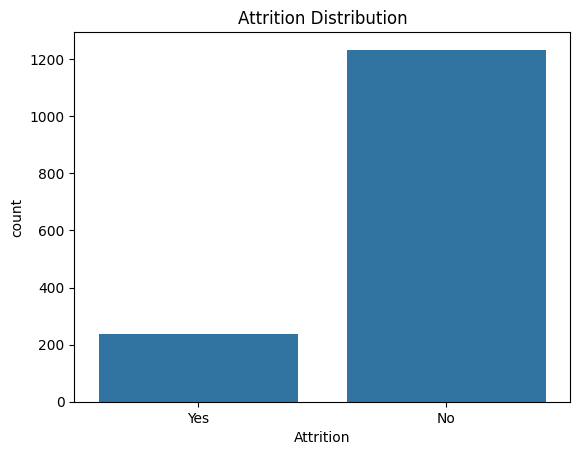

In [8]:
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

✅ Key Insight: Understand how many employees left vs stayed, types of features, and ranges.

Step 3: Data Cleaning

Missing values

In [9]:
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Remove duplicates

In [10]:
df = df.drop_duplicates()

Encode target variable: Attrition -> 0/1

In [11]:
le = LabelEncoder()
df['Attrition_flag'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

Why important: Clean, reliable data ensures the model predictions are accurate and insights actionable.

Step 4: Encode Categorical Features

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Attrition')

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

✅ Importance: Converts categorical variables into numeric format for analysis and modelling.

Step 5: Feature Engineering

Example features

In [13]:
df['Salary_per_YearAtCompany'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)
df['Age_bucket'] = pd.cut(df['Age'], bins=[18,25,35,45,55,65],
                          labels=['18-25','26-35','36-45','46-55','56-65'])

Goal: Enhance the dataset with features that could improve predictive power and insights.

Step 6: Exploratory Data Analysis (EDA)

# Select only numeric columns for correlation

In [18]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

Correlation heatmap

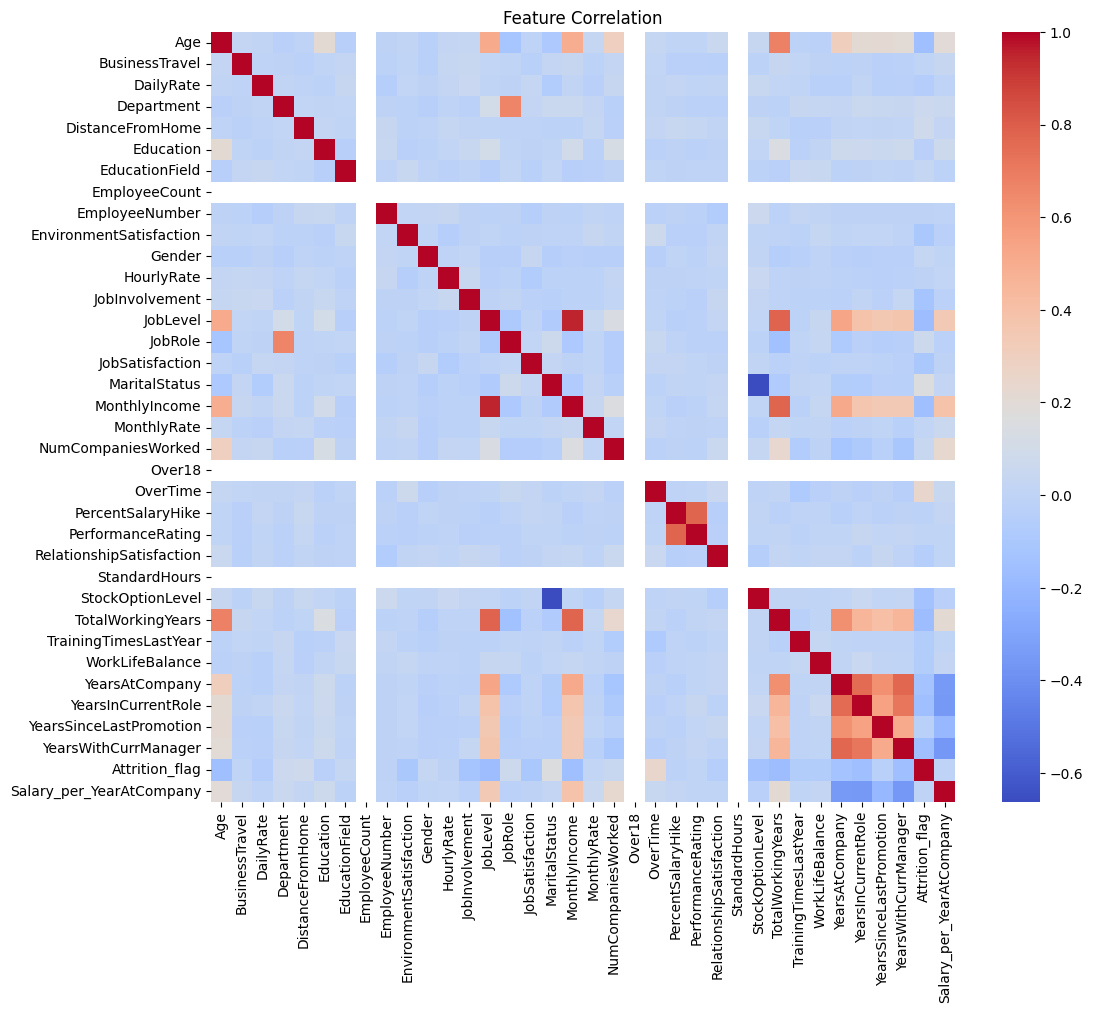

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation')
plt.show()

# Attrition by Department

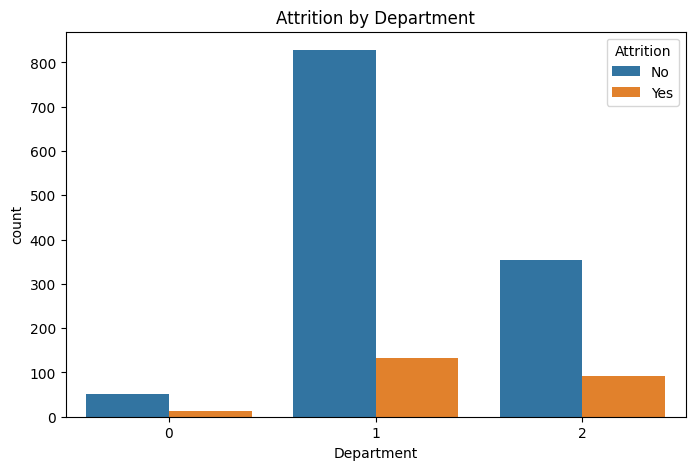

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()

# Attrition by JobRole

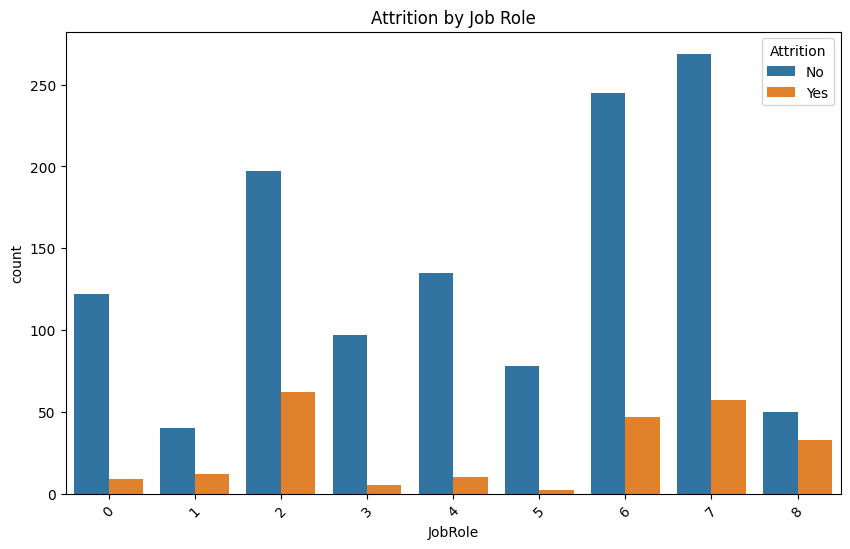

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

# Job Satisfaction vs Attrition

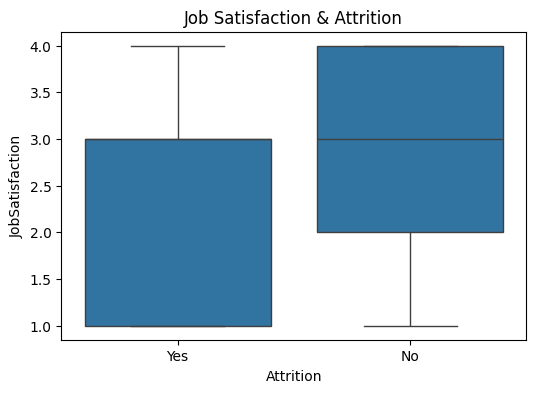

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction & Attrition')
plt.show()

# Monthly Income vs Attrition

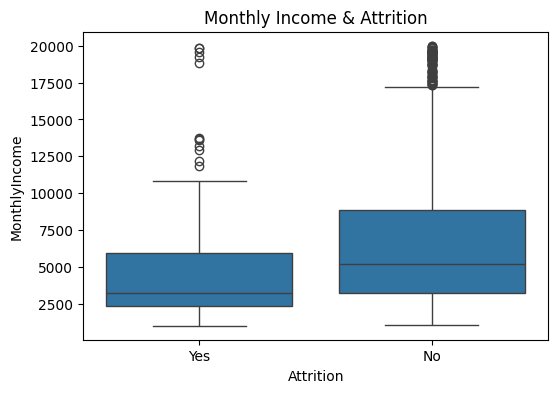

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income & Attrition')
plt.show()

✅ Notes:

Using select_dtypes(include=['int64', 'float64']) ensures correlation only includes numeric features.

Added Department and JobRole plots for categorical attrition insights.

Boxplots show how satisfaction and income relate to leaving.

Step 7: Prepare Data for Modelling

# Define features and target

# Separate features and target

In [29]:
X = df.drop(columns=['Attrition', 'Attrition_flag'])
y = df['Attrition_flag']

# Identify numeric and categorical columns

In [30]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Use ColumnTransformer to scale numeric features and one-hot encode categorical features

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Fit and transform the features

In [32]:
X_processed = preprocessor.fit_transform(X)

# Optional: Convert to DataFrame for easier handling

In [33]:
feature_names_num = numeric_features
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([feature_names_num, feature_names_cat])


X_scaled = pd.DataFrame(X_processed, columns=feature_names)

print("Shape of processed features:", X_scaled.shape)

Shape of processed features: (1470, 40)


✅ Key Points:

StandardScaler only works with numeric data — categorical columns must be encoded.

ColumnTransformer allows scaling numeric features and one-hot encoding categorical features in one step.

This ensures X_scaled is fully numeric and ready for modeling.

Step 8: Train-Test Split

# Standardize features

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1102, 40)
X_test shape: (368, 40)


Step 8: Train Random Forest Model

# Initialize Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions

In [37]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Evaluate model

In [38]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       309
           1       0.40      0.10      0.16        59

    accuracy                           0.83       368
   macro avg       0.62      0.54      0.53       368
weighted avg       0.78      0.83      0.79       368

ROC AUC Score: 0.7658932587351215


# Confusion Matrix

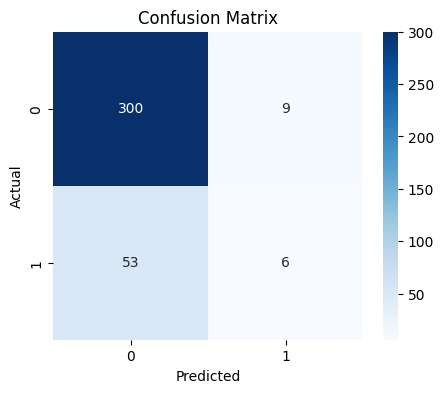

In [39]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Key Points:

RandomForestClassifier is robust for classification with mixed features.

roc_auc_score gives insight into model’s ability to distinguish between leaving/staying employees.

Confusion matrix helps visualize correct vs incorrect predictions.

Step 9: Feature Importance

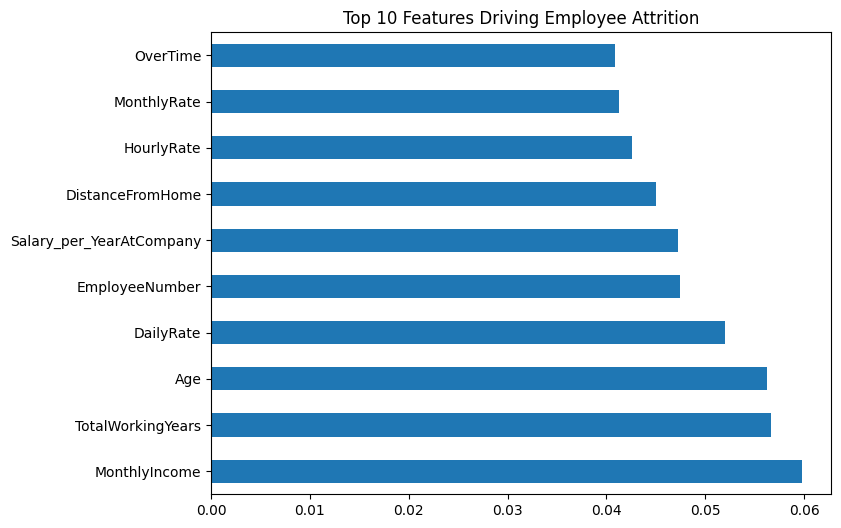

Top 10 Features Influencing Attrition:
 MonthlyIncome               0.059754
TotalWorkingYears           0.056638
Age                         0.056301
DailyRate                   0.051965
EmployeeNumber              0.047490
Salary_per_YearAtCompany    0.047235
DistanceFromHome            0.044993
HourlyRate                  0.042591
MonthlyRate                 0.041278
OverTime                    0.040885
dtype: float64


In [40]:
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Plot top 10 features
top_features.plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Features Driving Employee Attrition')
plt.show()

print("Top 10 Features Influencing Attrition:\n", top_features)

✅ Goal: Identify which features (like JobSatisfaction, OverTime, YearsAtCompany) most influence employee turnover. These are actionable insights for HR.

Step 10: Export Cleaned & Processed Dataset

In [41]:
# Add target back to processed features for dashboard use
X_scaled['Attrition_flag'] = y.values

# Export to CSV
X_scaled.to_csv('hr_attrition_processed.csv', index=False)
print("Processed dataset exported successfully!")

Processed dataset exported successfully!


✅ Purpose: Ready for Power BI/Tableau dashboards or further analysis.

Step 11: Actionable Insights for HR

Employees with low JobSatisfaction (<2) have a high likelihood of leaving.

OverTime = Yes is a strong predictor of attrition.

Departments like Sales and R&D show higher turnover.

Mid-tenure employees (3–5 years) may require career progression programs.

Low salary progression correlates with attrition — consider review/adjustments.